In [1]:
%cd ~/NetBeansProjects/ExpLosion/
from notebooks.common_imports import *

from gui.user_code import get_demsar_diagram, get_demsar_params
from gui.output_utils import *


sns.timeseries.algo.bootstrap = my_bootstrap
sns.categorical.bootstrap = my_bootstrap

/Users/miroslavbatchkarov/NetBeansProjects/ExpLosion


# Number of clusters for different composers and unlabelled corpora 

In [2]:
query_dict = {
             'clusters__noise': 0,
             'clusters__vectors__algorithm__in': ['turian'],
             'clusters__vectors__composer__in': ['Add', 'Socher'],
             'clusters__vectors__unlabelled__in': ['turian'],
             'clusters__vectors__dimensionality': 100,
             'clusters__vectors__rep': 0,
             'clusters__vectors__unlabelled_percentage': 100,
             'document_features_ev': 'AN+NN',
             'document_features_tr': 'J+N+AN+NN',
             'labelled': 'amazon_grouped-tagged'}

def go(query_dict):
    ids = Experiment.objects.filter(**query_dict).values_list('id', flat=True)
    print(ids)
    df = dataframe_from_exp_ids(ids, {'Clusters':'clusters__num_clusters', 
                                      'Composer':'clusters__vectors__composer',
                                      'Unlabelled':'clusters__vectors__unlabelled'})
    df = df.convert_objects(convert_numeric=True)
    g = sns.tsplot(data=df, time='Clusters', condition='Composer', 
               value='Accuracy', unit='folds',
               marker='s', linewidth=4, ci=68) 
    g.legend(loc='lower right')
    g.set(ylim=(0.45, .8), xlim=(0, 2000))

# g.set(xscale='log')
# sns.despine(left=True)

[240, 241, 242, 243, 244, 245, 246, 247, 248, 249]
Unlabelled has 5000 values
folds has 5000 values
Accuracy has 5000 values
Clusters has 5000 values
Composer has 5000 values


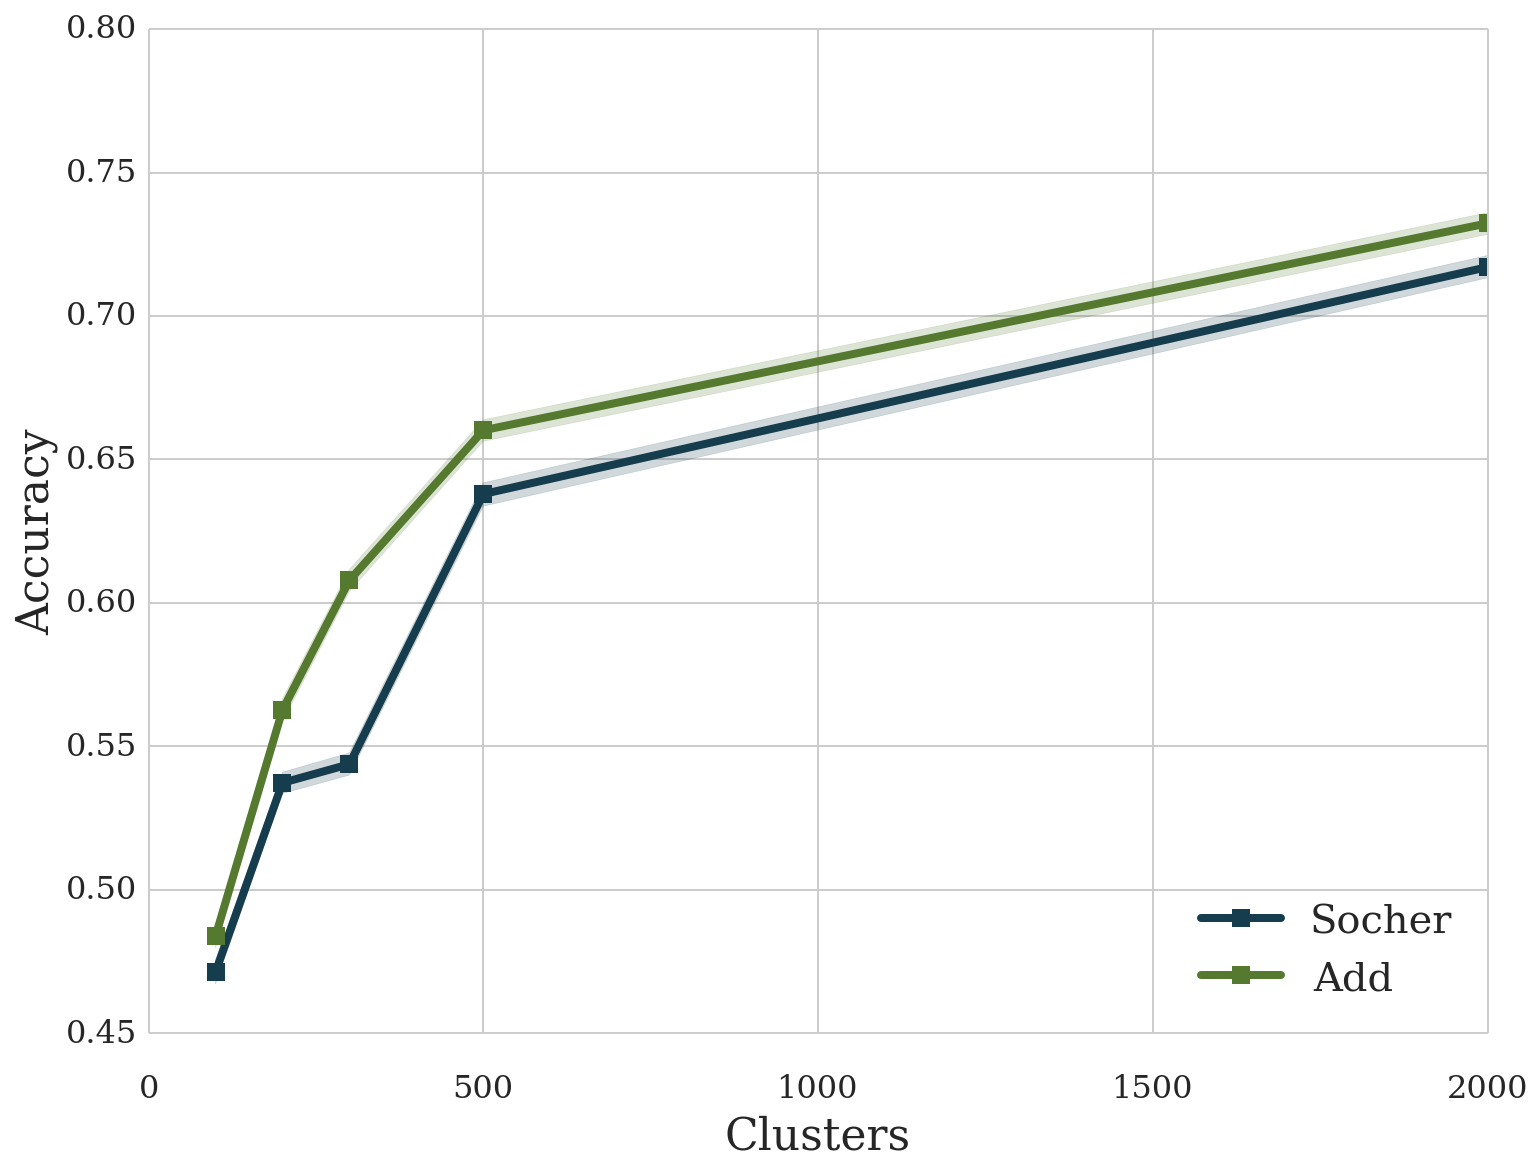

In [3]:
with sns.color_palette("cubehelix", 4):
    go(query_dict)
# plt.savefig('plot-clusters1.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

[250, 251, 252, 253, 254, 260, 261, 262, 263, 264]
Unlabelled has 5000 values
folds has 5000 values
Accuracy has 5000 values
Clusters has 5000 values
Composer has 5000 values


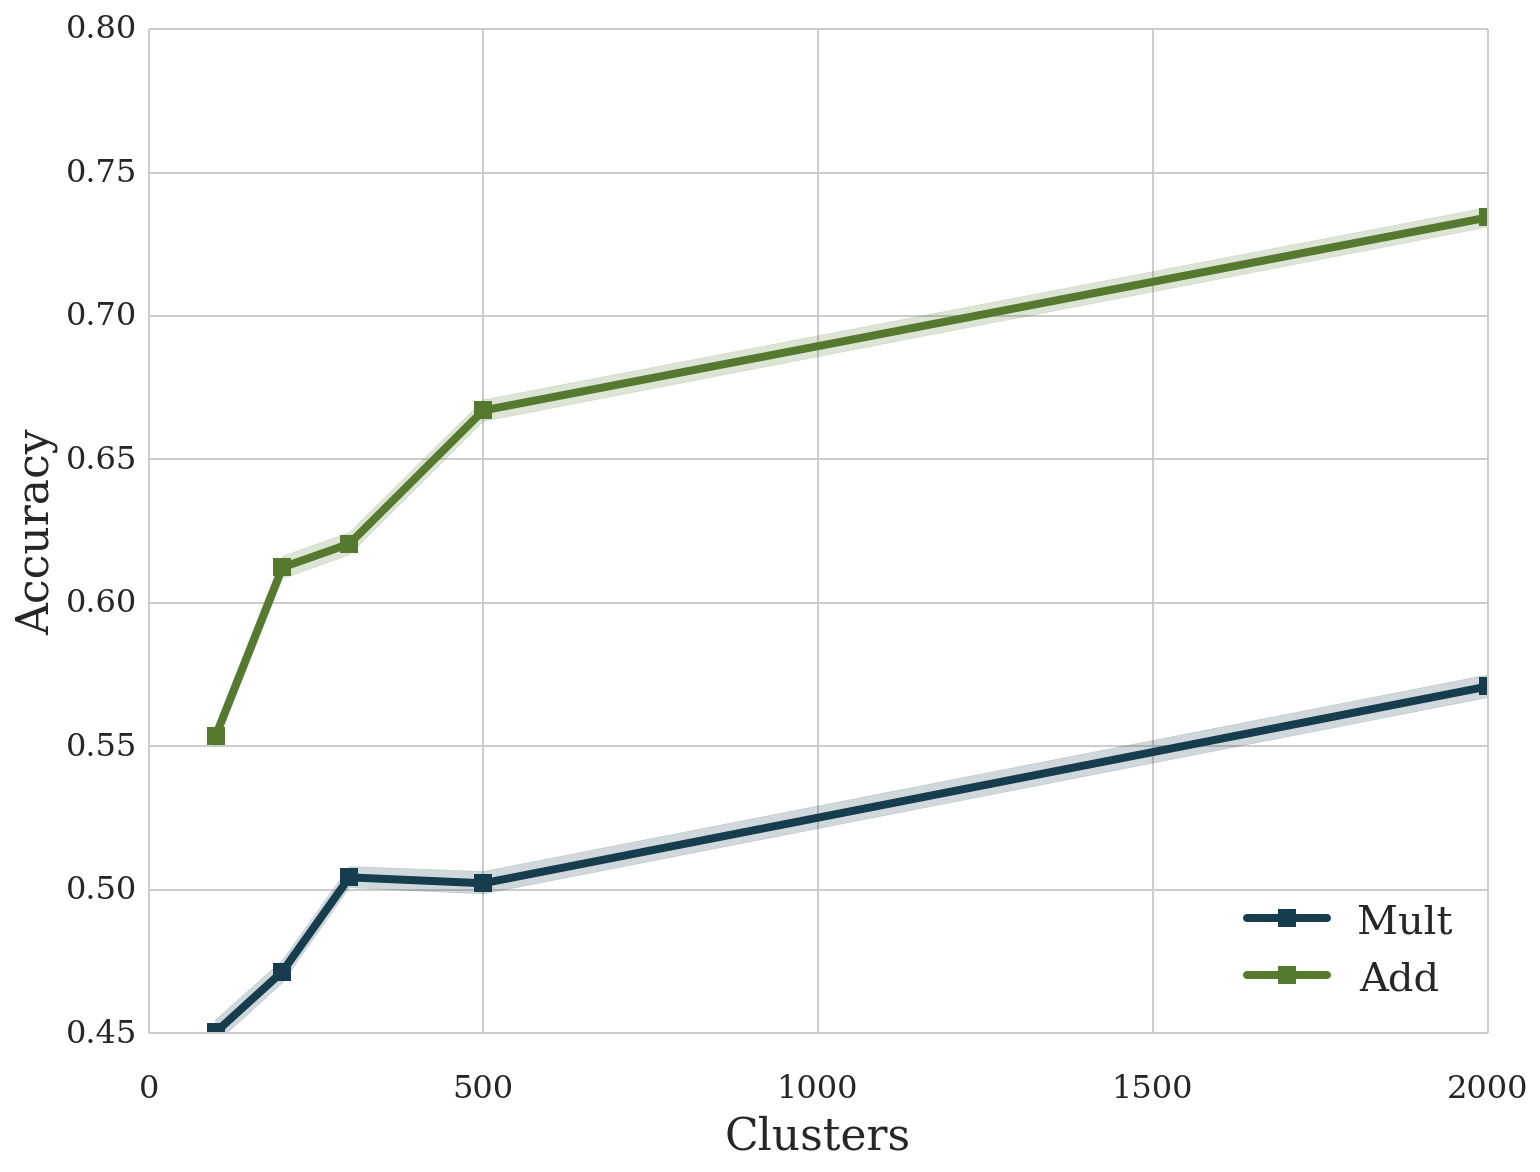

In [4]:
query_dict['clusters__vectors__algorithm__in'] = ['word2vec']
query_dict['clusters__vectors__composer__in'] = ['Add', 'Mult']
query_dict['clusters__vectors__unlabelled__in'] = ['gigaw']

with sns.color_palette("cubehelix", 4):
    go(query_dict)
# plt.savefig('plot-clusters2.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

/Users/miroslavbatchkarov/anaconda/envs/py3k/lib/python3.3/site-packages/matplotlib/backends/backend_pdf.py:2184: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  different = bool(ours != theirs)

  different = bool(ours != theirs)



[255, 256, 257, 258, 259, 265, 266, 267, 268, 269]
Unlabelled has 5000 values
folds has 5000 values
Accuracy has 5000 values
Clusters has 5000 values
Composer has 5000 values


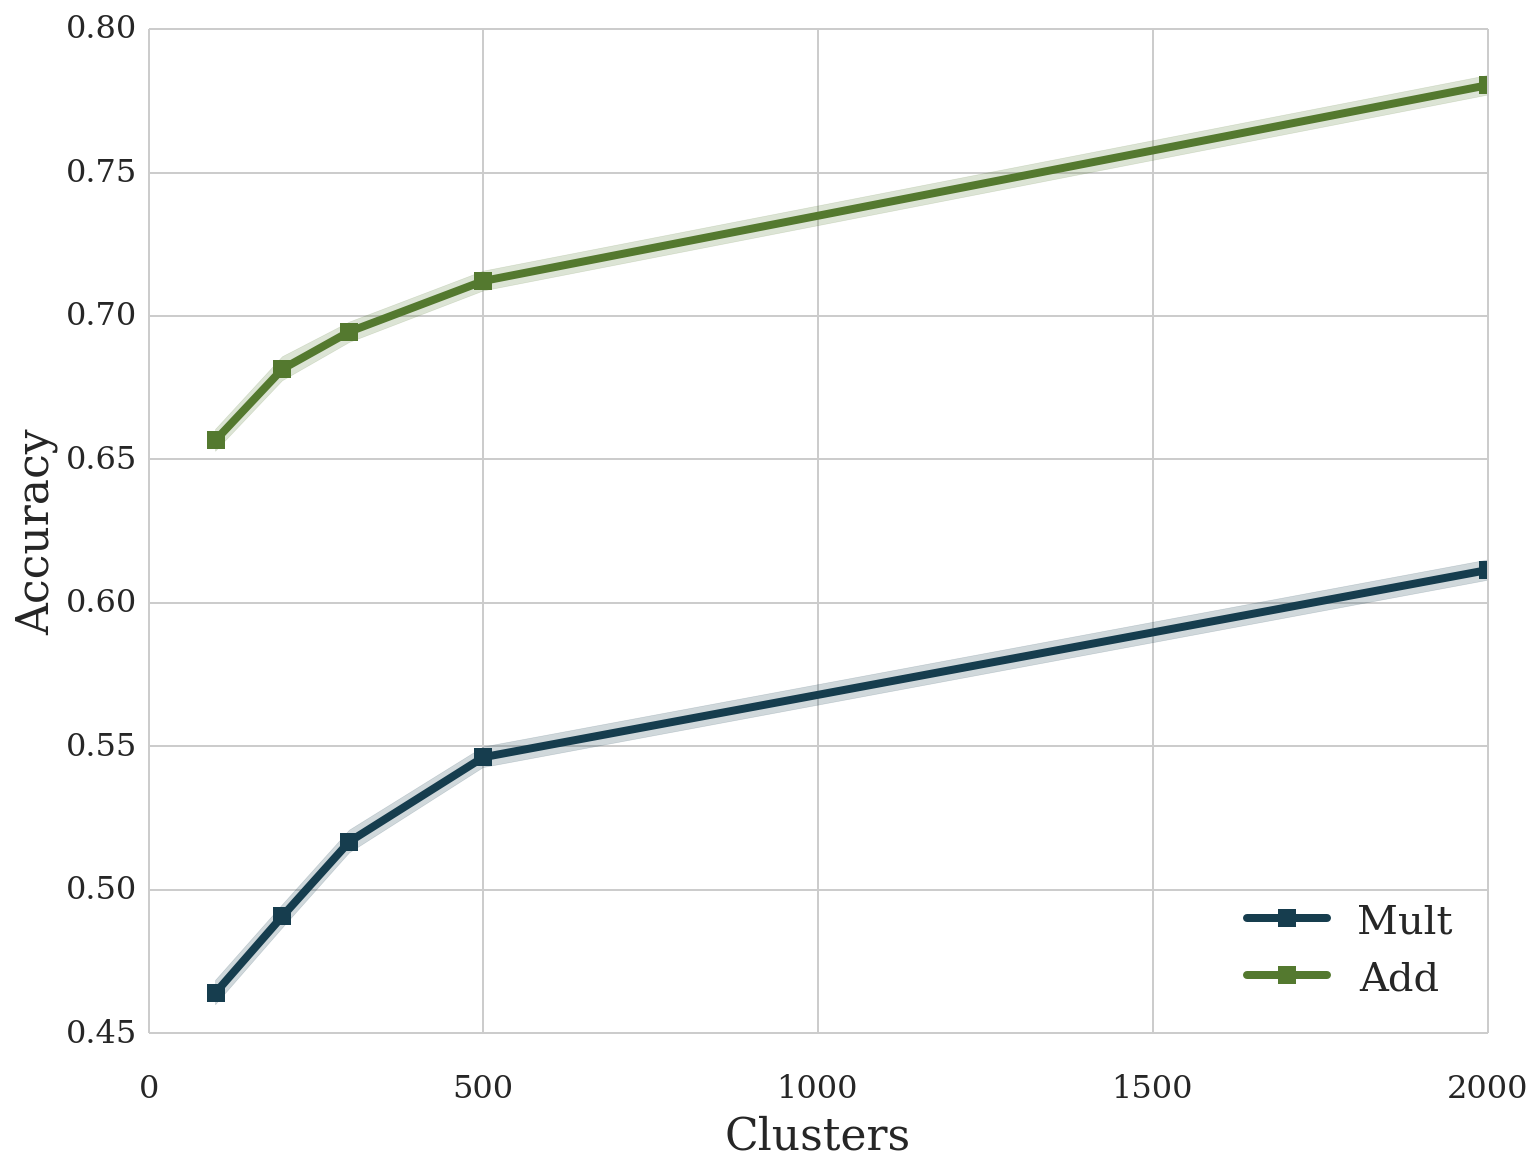

In [5]:
query_dict['clusters__vectors__unlabelled__in'] = ['wiki']
with sns.color_palette("cubehelix", 4):
    go(query_dict)
plt.savefig('plot-clusters3.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

/Users/miroslavbatchkarov/anaconda/envs/py3k/lib/python3.3/site-packages/IPython/kernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



[265, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295]
folds has 5500 values
Accuracy has 5500 values
Labelled has 5500 values
Percent has 5500 values


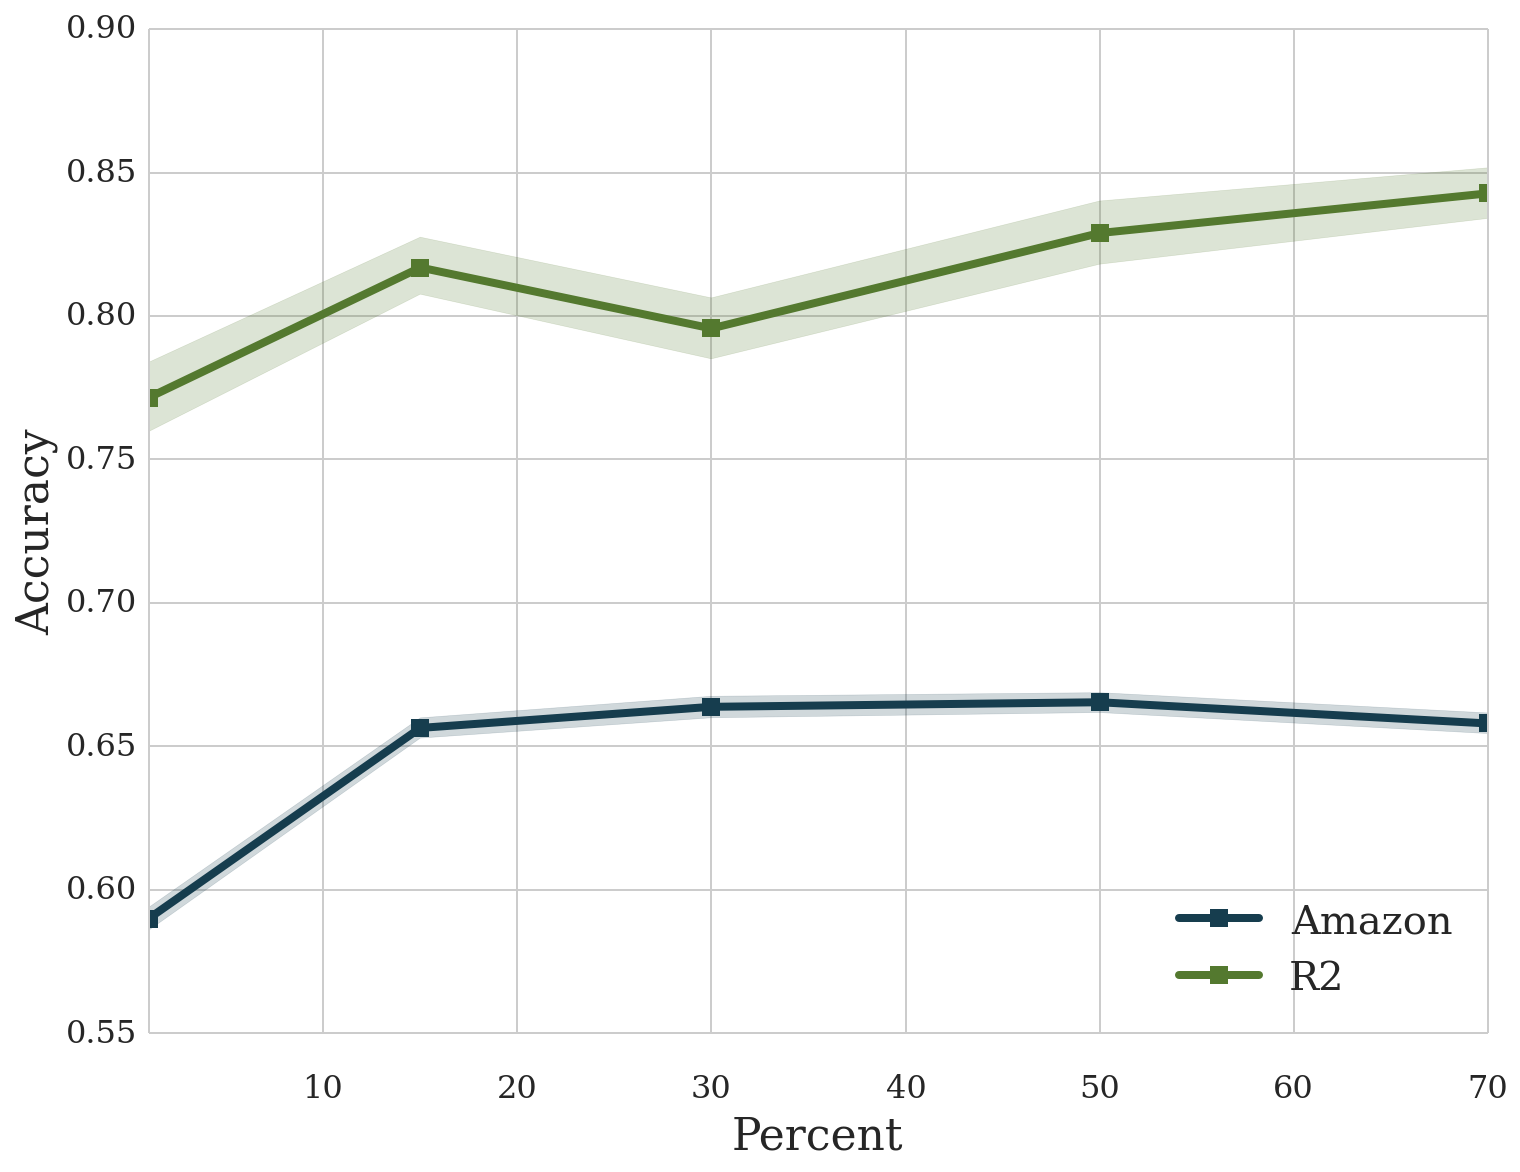

In [6]:
query_dict = {
'clusters__num_clusters': 100,
'clusters__vectors__algorithm': 'word2vec',
'clusters__vectors__composer': 'Add',
'clusters__vectors__dimensionality': 100,
'clusters__vectors__rep': 0,
'clusters__vectors__unlabelled': 'wiki',
# 'clusters__vectors__unlabelled_percentage': 70,
'document_features_ev': 'AN+NN',
'document_features_tr': 'J+N+AN+NN',
# 'labelled': 'amazon_grouped-tagged'
}
ids = Experiment.objects.filter(**query_dict).values_list('id', flat=True)
print(ids)
df = dataframe_from_exp_ids(ids, {'Labelled':'labelled', 
                                  'Percent':'clusters__vectors__unlabelled_percentage'})
df = df.convert_objects(convert_numeric=True)
df.Labelled[df.Labelled == 'AM'] = 'Amazon'
with sns.color_palette("cubehelix", 4):
    g = sns.tsplot(data=df, time='Percent', condition='Labelled', 
               value='Accuracy', unit='folds',
               marker='s', linewidth=4, ci=68);
g.legend(loc='lower right')
plt.savefig('plot-clusters4.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

### Ideally I want something like this, but seaborn is buggy 

[240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, '...(remaining elements truncated)...']
Unlabelled has 15000 values
folds has 15000 values
Accuracy has 15000 values
Clusters has 15000 values
Composer has 15000 values


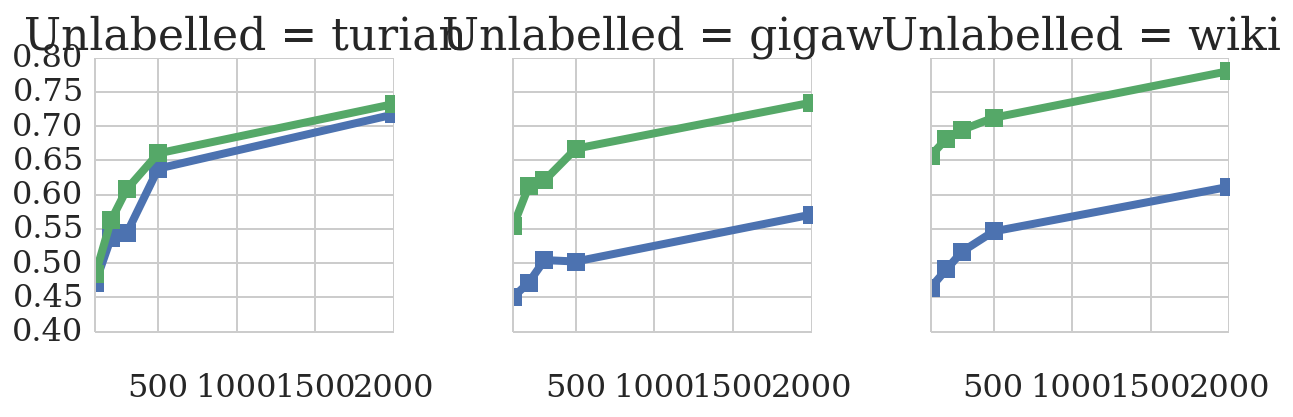

In [7]:
query_dict = {
             'clusters__noise':0,
             'clusters__vectors__algorithm__in': ['turian', 'word2vec'],
             'clusters__vectors__composer__in': ['Add', 'Socher', 'Mult'],
             'clusters__vectors__unlabelled__in': ['turian', 'wiki', 'gigaw'],
             'clusters__vectors__dimensionality': 100,
             'clusters__vectors__rep': 0,
             'clusters__vectors__unlabelled_percentage': 100,
             'document_features_ev': 'AN+NN',
             'document_features_tr': 'J+N+AN+NN',
             'labelled': 'amazon_grouped-tagged'}
ids = Experiment.objects.filter(**query_dict).values_list('id', flat=True)
print(ids)
df = dataframe_from_exp_ids(ids, {'Clusters':'clusters__num_clusters', 
                                  'Composer':'clusters__vectors__composer',
                                  'Unlabelled':'clusters__vectors__unlabelled'})
df = df.convert_objects(convert_numeric=True)
g = sns.FacetGrid(df, col='Unlabelled')  
g.map_dataframe(tsplot_for_facetgrid, time='Clusters', condition='Composer', 
                   value='Accuracy', unit='folds',
                   marker='s', linewidth=4, ci=68);

# Noise validation  

noise has 5500 values
folds has 5500 values
Accuracy has 5500 values
id has 5500 values
[260, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382]


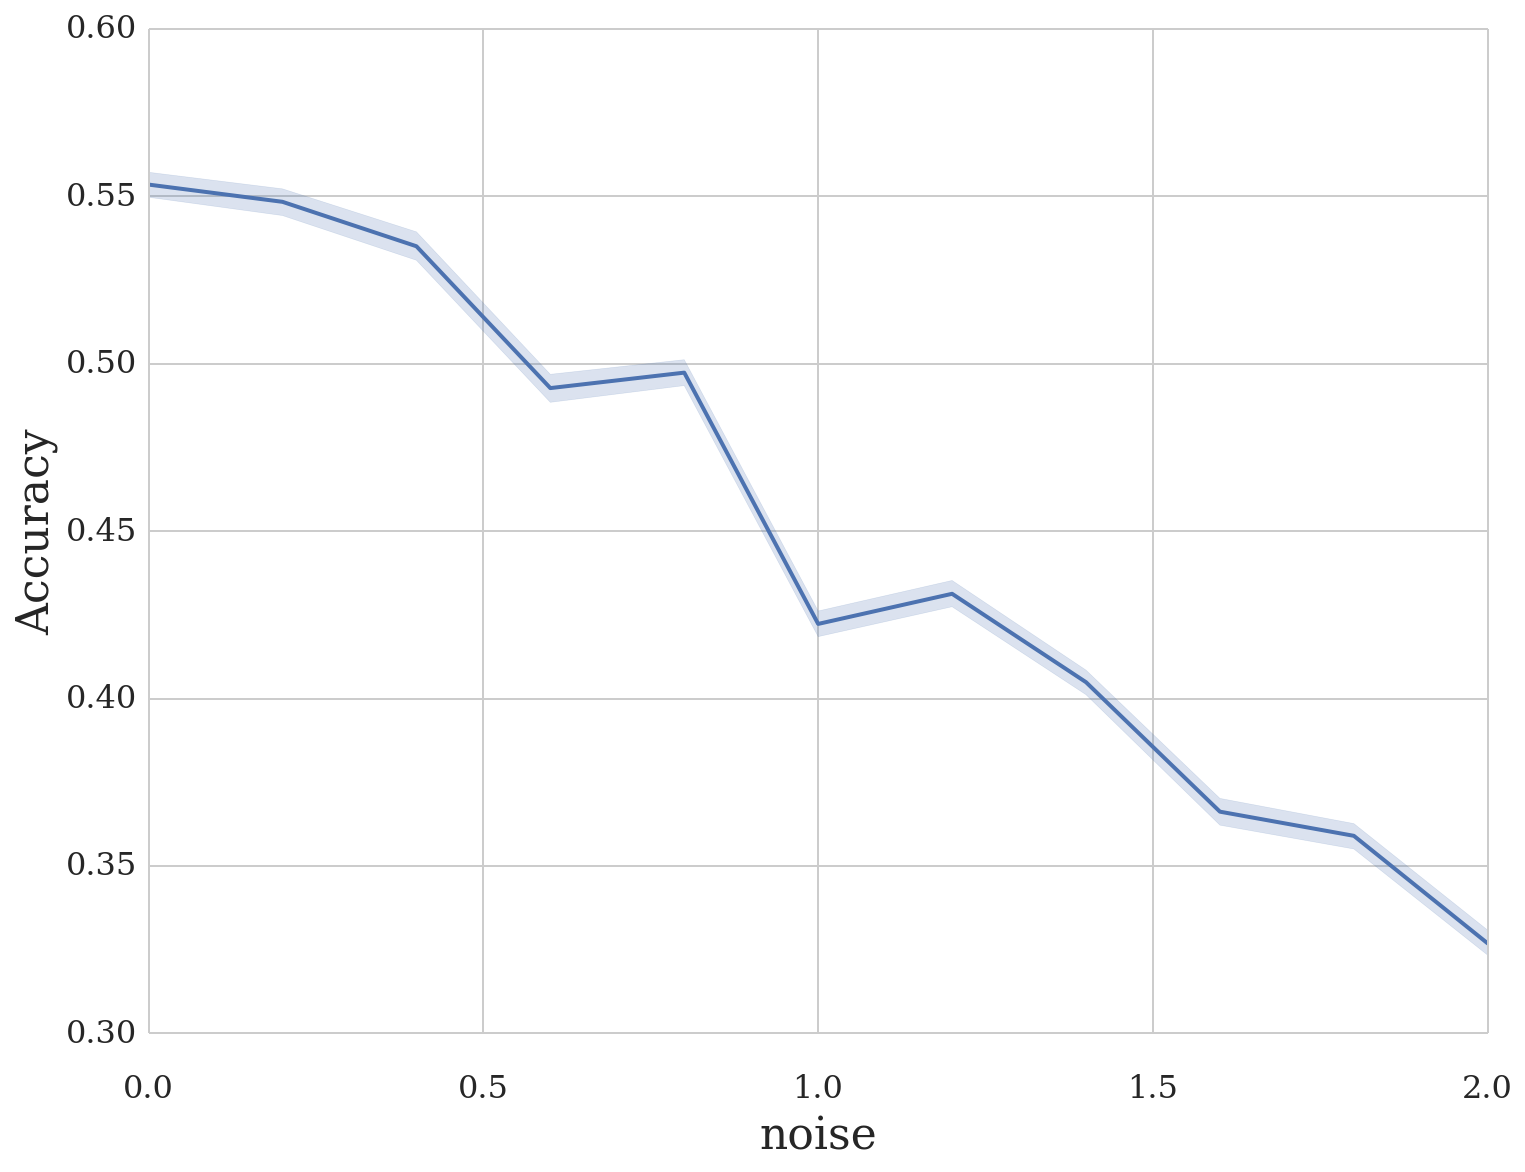

In [8]:
d = {#'clusters__noise': 2.0,
     'clusters__num_clusters': 100,
     'clusters__vectors__algorithm': 'word2vec',
     'clusters__vectors__avg': 0,
     'clusters__vectors__composer': 'Add',
     'clusters__vectors__dimensionality': 100,
     'clusters__vectors__reorder': 0,
     'clusters__vectors__rep': 0,
     'clusters__vectors__unlabelled': 'gigaw',
     'clusters__vectors__unlabelled_percentage': 100,
     'document_features_ev': 'AN+NN',
     'document_features_tr': 'J+N+AN+NN',
     'labelled': 'amazon_grouped-tagged'}
ids = Experiment.objects.filter(**d).values_list('id', flat=True)
df = dataframe_from_exp_ids(ids,
                           {'noise':'clusters__noise',
                           'id':'id'}).convert_objects(convert_numeric=True)
print(ids)
sns.tsplot(df, time='noise',value='Accuracy',unit='folds')
plt.savefig('plot-clustered-noise-validation.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1);

# Other experiments that do not merit a graph

In [9]:
from gui.user_code import pairwise_significance_exp_ids, get_data_for_signif_test
ids = Experiment.objects.filter(clusters__noise=0.0,
                                labelled='amazon_grouped-tagged',
                                clusters__vectors__composer='Add',
                                clusters__num_clusters=100,
                                clusters__vectors__unlabelled_percentage=100).values_list('id', flat=True)
ids

[245, 260, 265, 371, 372]

In [10]:
df = dataframe_from_exp_ids(ids, {'algo':'clusters__vectors__algorithm',
                                  'corpus':'clusters__vectors__unlabelled',
                                  'id':'id'})
df = df.convert_objects(convert_numeric=True)
df.head().dtypes

corpus has 2500 values
folds has 2500 values
Accuracy has 2500 values
algo has 2500 values
id has 2500 values


Accuracy    float64
algo         object
corpus       object
folds         int64
id            int64
dtype: object

In [11]:
df.groupby(['algo', 'corpus']).mean()

Accuracy  folds   id
algo   corpus                      
glove  wiki    0.695488  249.5  372
turian turian  0.483898  249.5  245
w2v    cwiki   0.674422  249.5  371
       gigaw   0.553538  249.5  260
       wiki    0.656727  249.5  265

In [12]:
for i in ids:
    low, mid, high = get_ci(i)[:-1]
    print(i, (high-low)/2)

245 0.00523332688962
260 0.00493037365177
265 0.00494512195122
371 0.00486921111466
372 0.00438864057212
